# EDA with Python and applying Logistic Regression
##### Here we will be working with the Titanic DataSet from Kaggle. This is a very famous data set and very often a student's first step in machine learning!
##### We'll be trying to predict a classification survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.
##### We'll use a "semi-cleaned" version of the titanic data set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
train = pd.read_csv('Data/titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

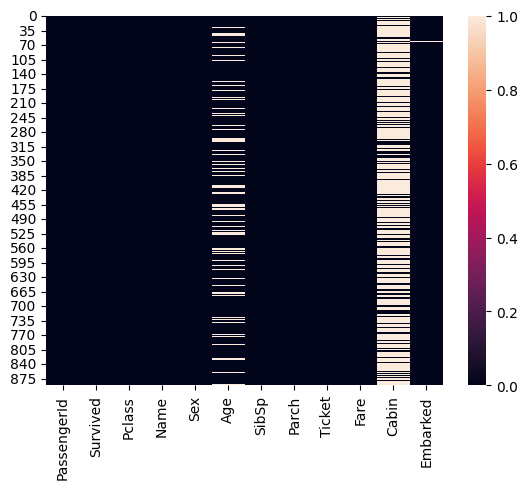

In [7]:
sns.heatmap(train.isnull())

<Axes: >

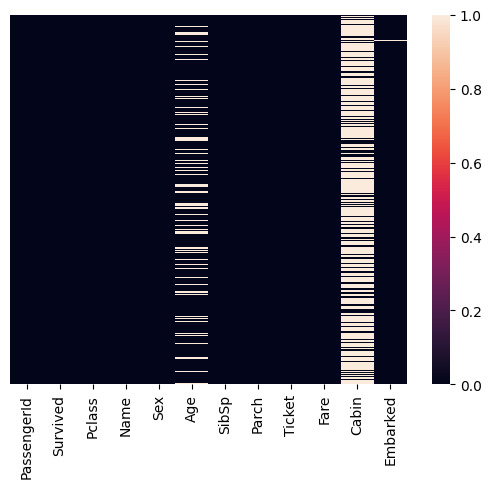

In [8]:
sns.heatmap(train.isnull(), yticklabels=False)

<Axes: >

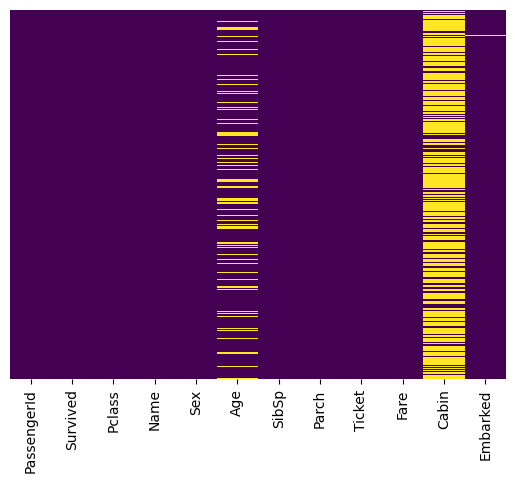

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

###### Roughly 20 percent of the age data is missing. The proportion of age missing is likely small enpugh for resonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with a basic level. We'll probably drop this later, or change it to another feature like "Cabin Know: 1 or 0"


C:\Users\swapn\AppData\Local\Temp\ipykernel_9324\3664983395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette = 'Set1')


<Axes: xlabel='Survived', ylabel='count'>

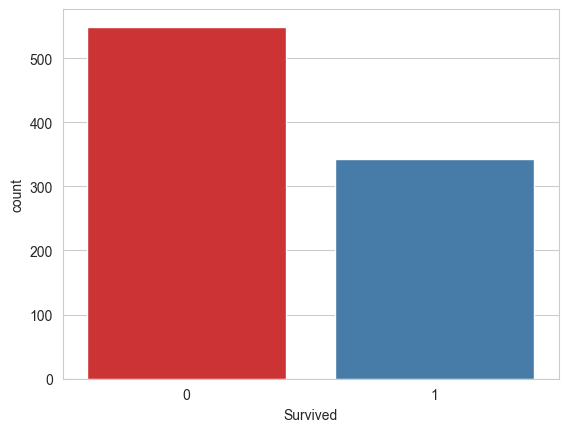

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette = 'Set1')

<Axes: xlabel='Survived', ylabel='count'>

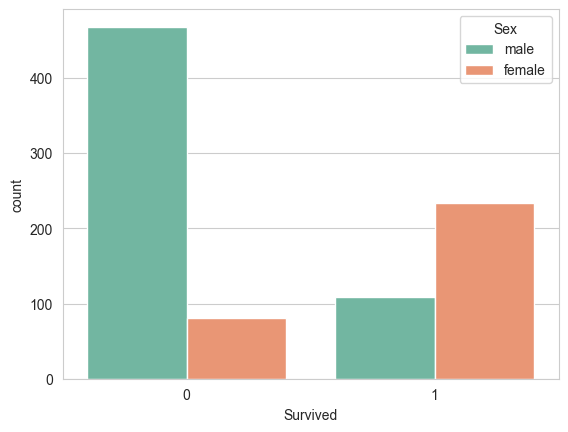

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data=train, palette = 'Set2')

<Axes: xlabel='Survived', ylabel='count'>

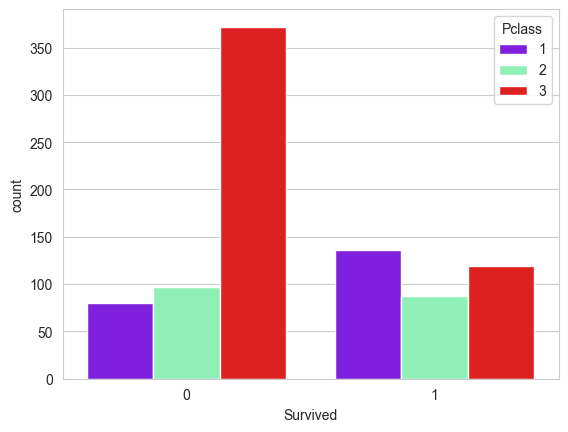

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = train, palette='rainbow')

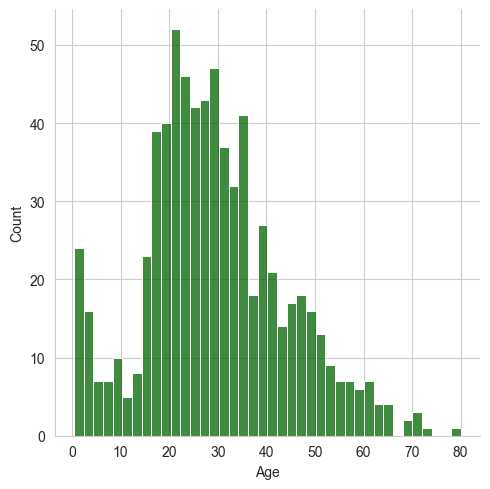

In [20]:
sns.displot(train['Age'].dropna(), kde=False, color='darkgreen', bins=40)

<Axes: >

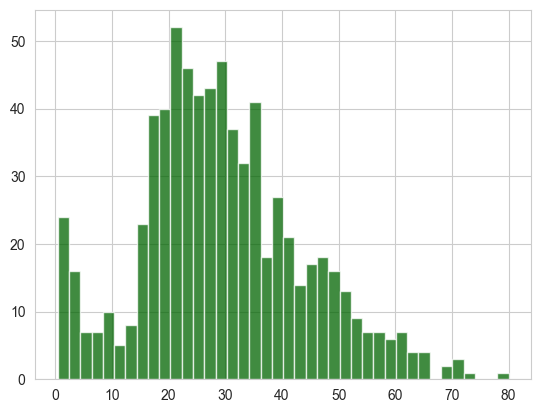

In [27]:
train['Age'].hist(bins=40, color='darkgreen', alpha=0.75)

C:\Users\swapn\AppData\Local\Temp\ipykernel_9324\380323150.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=train, palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

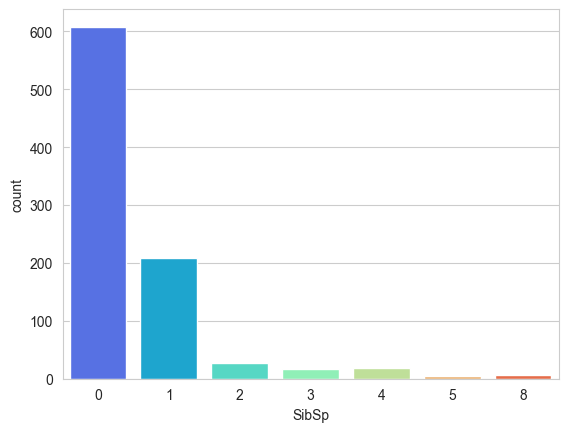

In [30]:
sns.countplot(x='SibSp', data=train, palette='rainbow')

<Axes: >

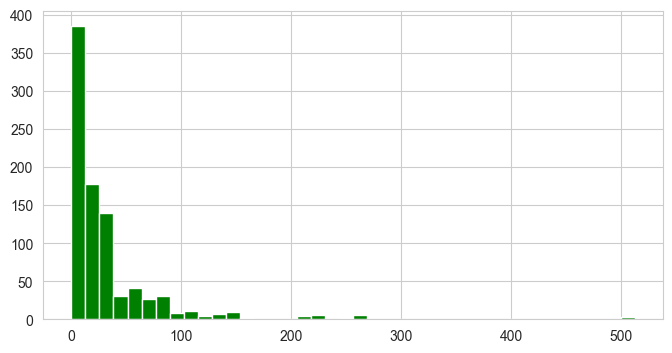

In [31]:
train['Fare'].hist(color="green", bins=40, figsize=(8,4))